In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("D:/SIP JINDAL TEXOFAB/Jindal Texofab Limited Survey Questionnaire (Responses).csv")
df

,Q1. Name of the hotel?,Q2. Total no. of rooms?,Q3. Purchase Authority?,"Q4. How frequently do you buy the linen, towel, uniform and toiletries?",Q5. What is the process to get registered as a new vendor?,Q6. What factors are most important to you when selecting a supplier for hotel toiletries?,Q7. What types of toiletry products do you typically purchase for your hotel?,Q8. Do you have any specific preferences regarding packaging?,"Q9. What are the main challenges while buying linen, uniform & toiletries?","Q10. Would you be interested in exploring a direct supply relationship with a textile manufacturer like Jindal Texofab for your hotel's linen, uniform, and toiletry needs?"
0,Hotel Kabir,15,General Manager,"Linen - Every 3 Months, Towel - Every 2 Months...",It depends on the products quality and price p...,"Price, Quality","Shampoo, Soap, Hotel Linen, Bath linen, Room F...",Individual Bottles,Sometimes they didn't give the total orders th...,Yes
1,Nirala Punjabi Hotel,16,Manager,"Linen - Every 2 Months, Towel - Every 2 Months...",It depends on the products quality and price (...,"Price, Quality","Shampoo, Soap, Hotel Linen, Bath linen, Phenyle",Individual Bottles,No issue,Maybe (Not Sure)
2,Hotel Arihant(2 Star),40,General Manager,"Line - Every 3 Months, Towels - Every 2 Months...",Potential vendors need to submit products samp...,"Price, Quality, Reliability","Shampoo, Conditioner, Soap, Lotion, Shower Gel...",Individual Bottles,Managing inventory levels and negotiating comp...,Yes
3,Mannat Guest House,12,Owner,"Linen - Every 1 to 1.5 Month, Towels - Every 1...",Send an introductory email with a catalogue an...,"Price, Quality, Variety","Shampoo, Soap, Sometimes shower caps and combs.",Compact packaging works best for our property ...,Inventory management and finding affordable bu...,No
4,Hotel AM : PM,17,Office Manager,"Linen - Every 2.5 to 3 Months, Towels - Every ...",Company has to show product catalogue and we w...,"Price, Quality","Shampoo, Body Wash, Soap",Individual Bottles,Finding suppliers who can meet our exact speci...,Maybe (Not Sure)
...,...,...,...,...,...,...,...,...,...,...
145,Aashray Hotel,19,Owner,"Linen - Every 3 Months, Towels - Every 3 Month...",Complete the process for becoming vendor by su...,"Price, Quality","Shampoo, Soap, Hotel Linen","Refillable Dispensers,",Managing minimum order quantities and inconsis...,Maybe (Not Sure)
146,Hotel Samar Residency,25,Front Office Manager,"Linen - Every 3 Months, Towels - Every 2 Month...",Come with your product catalogue and pricing d...,"Price, Quality, Variety","Shampoo, Soap, Lotion, Hotel Linen",Refillable Dispensers,Facing difficulties in inconsistent demand and...,Maybe (Not Sure)
147,Krishna Homestay,11,Owner,"Linen - 3 to 4 Months, Towels - Every 3 Months...",Submit your product sample here.,"Price, Quality","Shampoo, Soap",Refillable Dispensers,No such issues with us till now.,No
148,Hotel Shubh Shree,21,Owner,"Linen - Every 3 Months, Towels - Every 3 Month...",Submit your company details and product sample...,"Price, Quality, Variety","Shampoo, Soap, Hotel Linen",Refillable Dispensers,Incomplete orders and maintaining proper inven...,No


# Question 1: Name of the hotel?

In [42]:
print(f"Number of unique hotels: {df['Q1. Name of the hotel?'].nunique()}")

Number of unique hotels: 149


In [43]:
def room_category(rooms):
    if rooms <= 20:
        return 'Small (<=20 rooms)'
    elif rooms <= 40:
        return 'Medium (21-40 rooms)'
    else:
        return 'Large (>40 rooms)'

df['Room_Category'] = df['Q2. Total no. of rooms?'].apply(room_category)

type_by_size = pd.crosstab(df['Room_Category'], df['Hotel_Type'], normalize='index')

type_by_size.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Hotel Types by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Proportion')
plt.legend(title='Hotel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyError: 'Hotel_Type'

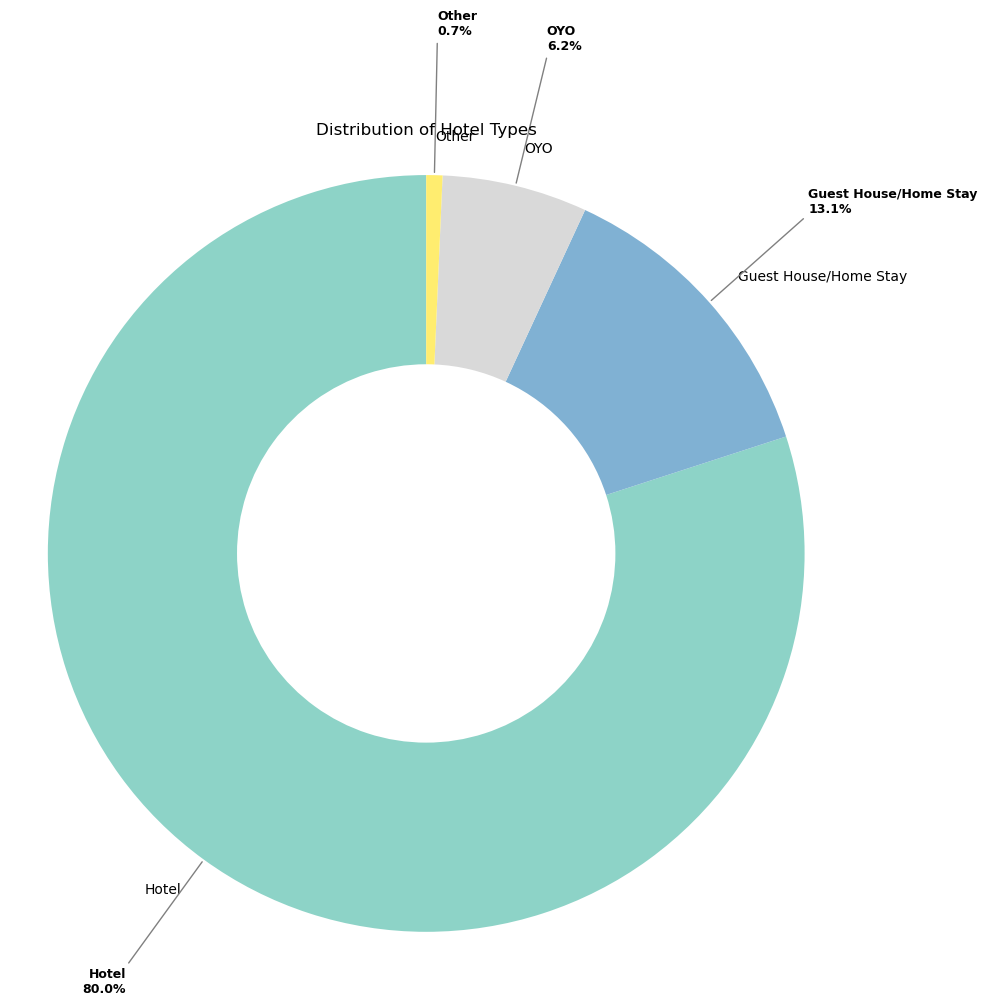

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def categorize_hotel(name):
    name = name.lower()
    if 'oyo' in name:
        return 'OYO'
    elif 'hotel' in name:
        return 'Hotel'
    elif 'palace' in name:
        return 'Palace'
    elif 'inn' in name or 'residency' in name:
        return 'Inn/Residency'
    elif 'guest house' in name or 'home stay' in name:
        return 'Guest House/Home Stay'
    else:
        return 'Other'

df['Hotel_Type'] = df['Q1. Name of the hotel?'].apply(categorize_hotel)
type_counts = df['Hotel_Type'].value_counts()

# Sort the data and filter out small slices
type_counts_sorted = type_counts.sort_values(ascending=False)
threshold = 2  # Adjust this value to determine what's considered a small slice
small_slices = type_counts_sorted[type_counts_sorted < threshold]
large_slices = type_counts_sorted[type_counts_sorted >= threshold]

if not small_slices.empty:
    large_slices['Other'] = small_slices.sum()
    large_slices = large_slices.sort_values(ascending=False)

colors = plt.cm.Set3(np.linspace(0, 1, len(large_slices)))

plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(large_slices.values, 
                        labels=large_slices.index, 
                        colors=colors,
                        startangle=90, 
                        wedgeprops=dict(width=0.5))

# Add percentage labels inside the wedges
total = sum(large_slices.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    pct = f'{100.*large_slices.values[i]/total:.1f}%'
    plt.annotate(f'{large_slices.index[i]}\n{pct}', xy=(x, y), xytext=(1.35*x, 1.4*y),
                 horizontalalignment=horizontalalignment,
                 verticalalignment='center',
                 fontsize=9, fontweight='bold',
                 arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray'))

plt.title('Distribution of Hotel Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Question 2: Total no. of rooms?

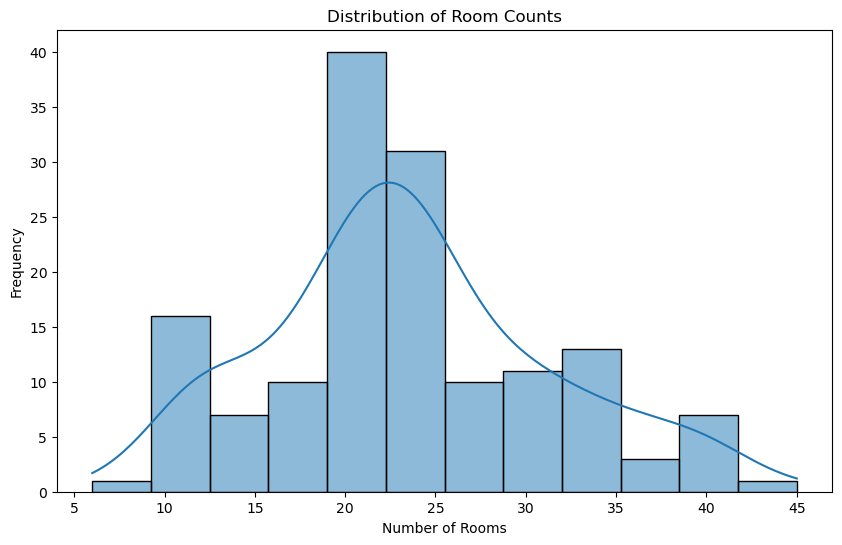

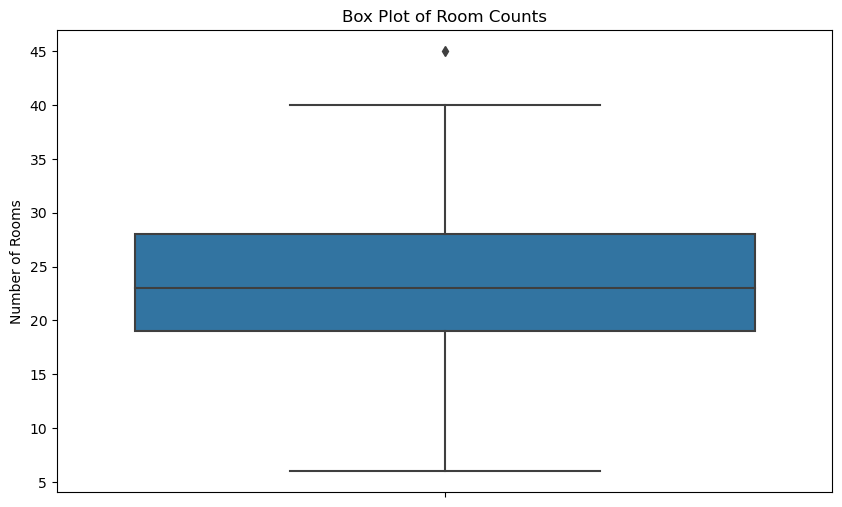

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Q2. Total no. of rooms?'], kde=True)
plt.title('Distribution of Room Counts')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Q2. Total no. of rooms?'])
plt.title('Box Plot of Room Counts')
plt.ylabel('Number of Rooms')
plt.show()

# Question 3: Purchase Authority?

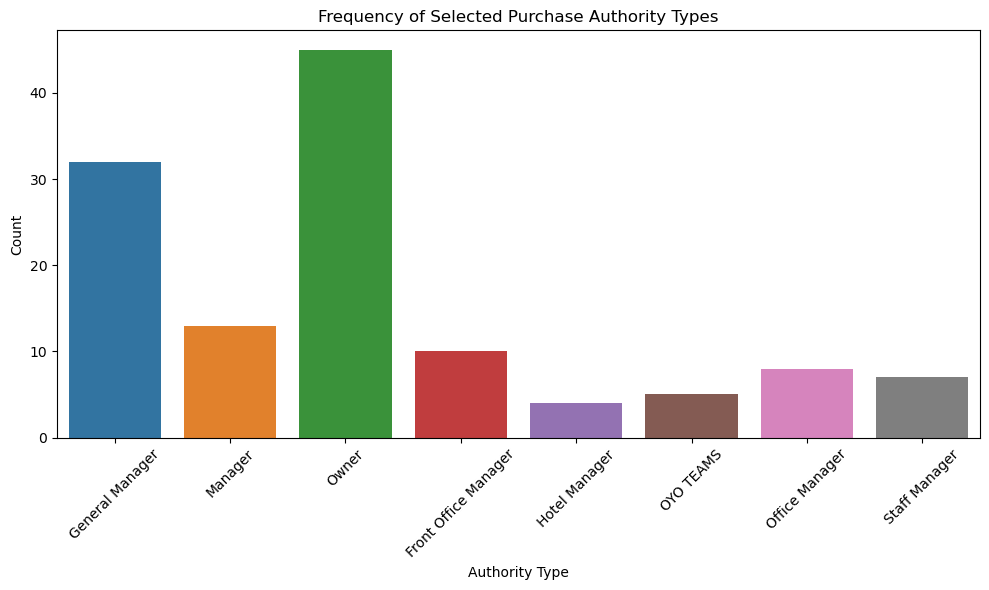

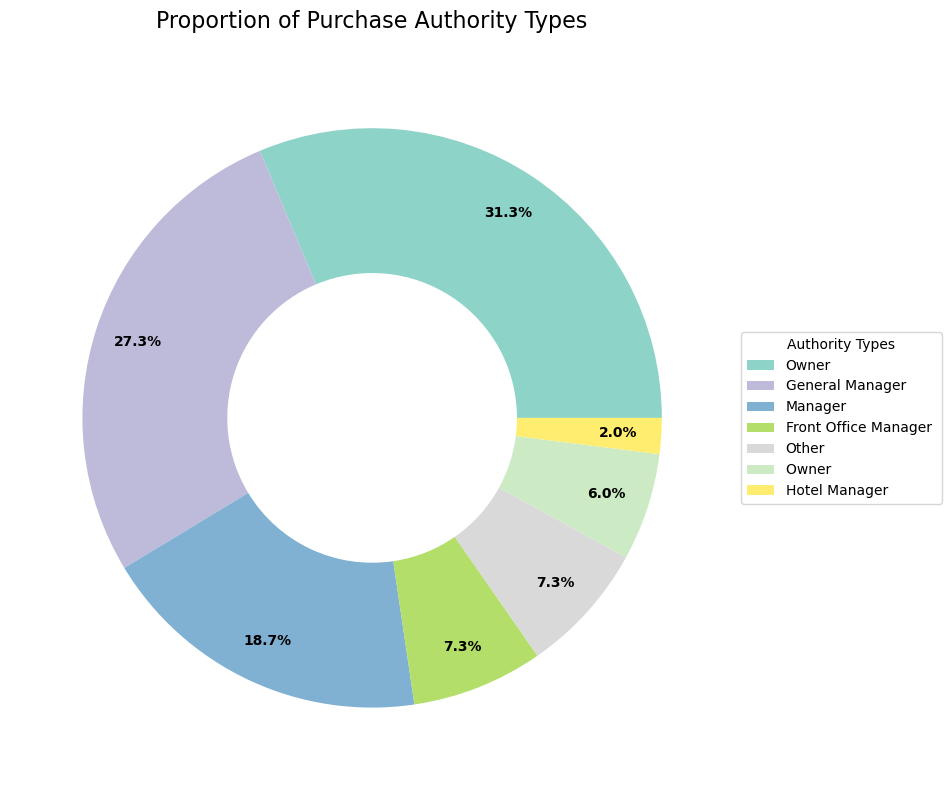

In [34]:
# Define the authority types to include and their corresponding values
authority_types = {
    'General Manager': 32,
    'Manager': 13,
    'Owner': 45,
    'Front Office Manager': 10,
    'Hotel Manager': 4,
    'OYO TEAMS': 5,
    'Office Manager': 8,
    'Staff Manager': 7
}
# Count the occurrences of each included authority type
authority_counts = df['Q3. Purchase Authority?'].value_counts()
# Combine the counts from the data and the provided values
combined_counts = pd.Series(authority_types)
combined_counts = combined_counts.fillna(authority_counts).fillna(0).astype(int)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_counts.index, y=combined_counts.values)
plt.title('Frequency of Selected Purchase Authority Types')
plt.xlabel('Authority Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Assuming authority_counts is your original data
threshold = 3.0  # Adjust this value to determine what goes into "Other"
other_mask = authority_counts < threshold
other_sum = authority_counts[other_mask].sum()

# Create a new series with the smaller categories grouped into "Other"
authority_counts_grouped = authority_counts[~other_mask].copy()
authority_counts_grouped['Other'] = other_sum

# Sort values for better visual hierarchy
authority_counts_grouped = authority_counts_grouped.sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Increased figure size for better readability
colors = plt.cm.Set3(np.linspace(0, 1, len(authority_counts_grouped)))  # Use a color palette

wedges, texts, autotexts = plt.pie(authority_counts_grouped.values, 
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   pctdistance=0.85,
                                   wedgeprops=dict(width=0.5))  # Creates a donut chart

plt.title('Proportion of Purchase Authority Types', fontsize=16, pad=20)

# Add a legend
plt.legend(wedges, authority_counts_grouped.index,
           title="Authority Types",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
plt.tight_layout()
plt.show()

# Question 4:  How frequently do you buy the linen, towel, uniform and toiletries?

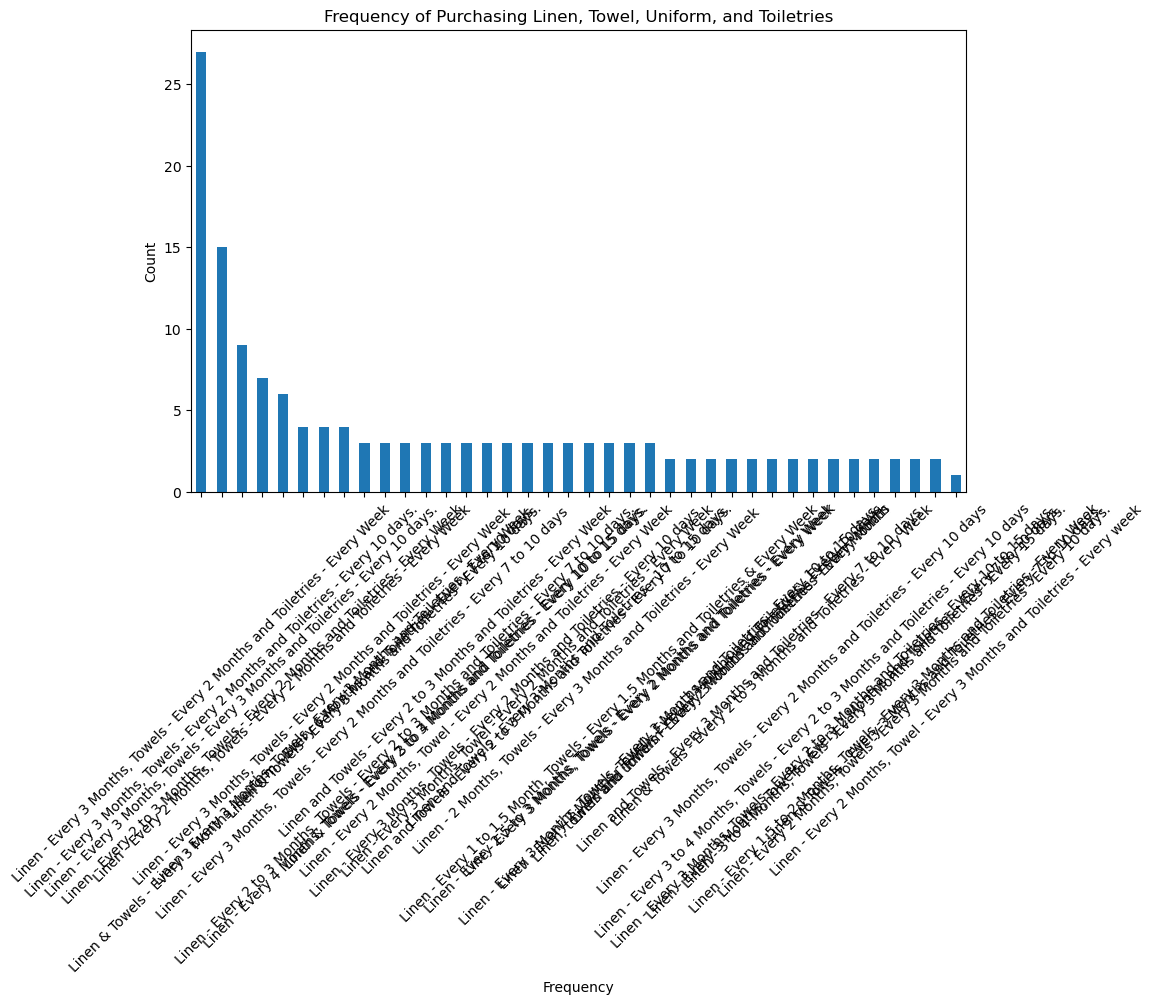

ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

<Figure size 1200x600 with 0 Axes>

In [51]:
# Extract the frequency information
frequency_data = df["Q4. How frequently do you buy the linen, towel, uniform and toiletries?"]

# Count the frequency of each category
freq_counts = frequency_data.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
freq_counts.plot(kind='bar')
plt.title("Frequency of Purchasing Linen, Towel, Uniform, and Toiletries")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
freq_pivot = frequency_data.str.split(',', expand=True)
freq_pivot.columns = ['Linen', 'Towel', 'Uniform', 'Toiletries']
freq_pivot = freq_pivot.apply(lambda x: x.str.strip())
freq_pivot.plot(kind='bar', stacked=True)
plt.title("Frequency of Purchasing Linen, Towel, Uniform, and Toiletries")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# Create a heatmap
plt.figure(figsize=(10, 8))
freq_pivot = frequency_data.str.split(',', expand=True)
freq_pivot.columns = ['Linen', 'Towel', 'Toiletries']
freq_pivot = freq_pivot.apply(lambda x: x.str.strip())
sns.heatmap(freq_pivot.value_counts().unstack(), cmap='YlOrRd', annot=True, fmt='.0f')
plt.title("Frequency of Purchasing Linen, Towel, and Toiletries")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.show()

# Question 5: What is the process to get registered as a new vendor?

In [ ]:
def categorize_process(text):
    if pd.isna(text):
        return 'No Response'
    elif 'sample' in text.lower():
        return 'Product Sample Required'
    elif 'online' in text.lower() or 'website' in text.lower():
        return 'Online Registration'
    elif 'catalogue' in text.lower():
        return 'Product Catalogue Required'
    else:
        return 'Other'

df['Process_Type'] = df['Q5. What is the process to get registered as a new vendor?'].apply(categorize_process)

process_counts = df['Process_Type'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(process_counts.values, labels=process_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Types of Vendor Registration Processes')
plt.axis('equal')
plt.show()

def hotel_size_category(rooms):
    if rooms <= 20:
        return 'Small (<=20 rooms)'
    elif rooms <= 40:
        return 'Medium (21-40 rooms)'
    else:
        return 'Large (>40 rooms)'

df['Hotel_Size'] = df['Q2. Total no. of rooms?'].apply(hotel_size_category)

process_by_size = pd.crosstab(df['Hotel_Size'], df['Process_Type'], normalize='index')

process_by_size.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Vendor Registration Process by Hotel Size')
plt.xlabel('Hotel Size')
plt.ylabel('Proportion')
plt.legend(title='Process Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Question 6: What factors are most important to you when selecting a supplier for hotel toiletries?

In [ ]:
factors = ['Price', 'Quality', 'Reliability', 'Variety', 'Sustainability']
factor_counts = [df['Q6. What factors are most important to you when selecting a supplier for hotel toiletries?'].str.contains(factor).sum() for factor in factors]

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=factor_counts)
plt.title('Important Factors in Supplier Selection')
plt.xlabel('Factor')
plt.ylabel('Count')
plt.show()

# Radar chart
fig = go.Figure(data=go.Scatterpolar(
  r=factor_counts,
  theta=factors,
  fill='toself'
))
fig.update_layout(title='Relative Importance of Supplier Selection Factors')
iplot(fig)

# Question 7: What types of toiletry products do you typically purchase for your hotel? 

In [ ]:
import numpy as np  # Add this line to import NumPy

all_products = df['Q7. What types of toiletry products do you typically purchase for your hotel?'].str.split(',').explode()
product_counts = all_products.str.strip().value_counts()

# Calculate percentages
total_count = product_counts.sum()
product_percentages = (product_counts / total_count) * 100

# Group small categories (e.g., less than 3% into 'Other')
threshold = 3
other_mask = product_percentages < threshold
if other_mask.any():
    other_count = product_counts[other_mask].sum()
    other_percentage = product_percentages[other_mask].sum()
    product_counts = pd.concat([product_counts[~other_mask], pd.Series({'Other': other_count})])
    product_percentages = pd.concat([product_percentages[~other_mask], pd.Series({'Other': other_percentage})])
    
# Sort values in descending order for better visualization
product_counts = product_counts.sort_values(ascending=False)
product_percentages = product_percentages[product_counts.index]

# Create labels with percentages
labels = [f'{index}\n({percentage:.1f}%)' for index, percentage in product_percentages.items()]

# Plot
plt.figure(figsize=(12, 8))  # Increased figure size
cmap = plt.cm.tab20c  # Different colormap for more contrast
colors = cmap(np.linspace(0, 1, len(product_counts)))
squarify.plot(sizes=product_counts.values, label=labels, alpha=0.8, color=colors)
plt.title('Treemap of Toiletry Products')
plt.axis('off')
plt.tight_layout()
plt.show()


products = ['Shampoo', 'Soap', 'Conditioner', 'Body Wash', 'Lotion', 'Dental Kits', 'Shower Caps']
product_counts = [df['Q7. What types of toiletry products do you typically purchase for your hotel?'].str.contains(product).sum() for product in products]

plt.figure(figsize=(10, 6))
sns.barplot(x=products, y=product_counts)
plt.title('Commonly Purchased Toiletry Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Question 8: Do you have any specific preferences regarding packaging?

In [ ]:
packaging_prefs = df['Q8. Do you have any specific preferences regarding packaging?'].value_counts().head()

plt.figure(figsize=(10, 6))
plt.pie(packaging_prefs.values, labels=packaging_prefs.index, autopct='%1.1f%%')
plt.title('Packaging Preferences')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=packaging_prefs.index, y=packaging_prefs.values)
plt.title('Packaging Preferences')
plt.xlabel('Preference')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Question 9: What are the main challenges while buying linen, uniform & toiletries?

AttributeError: module 'squarify' has no attribute 'normalize_coordinates'

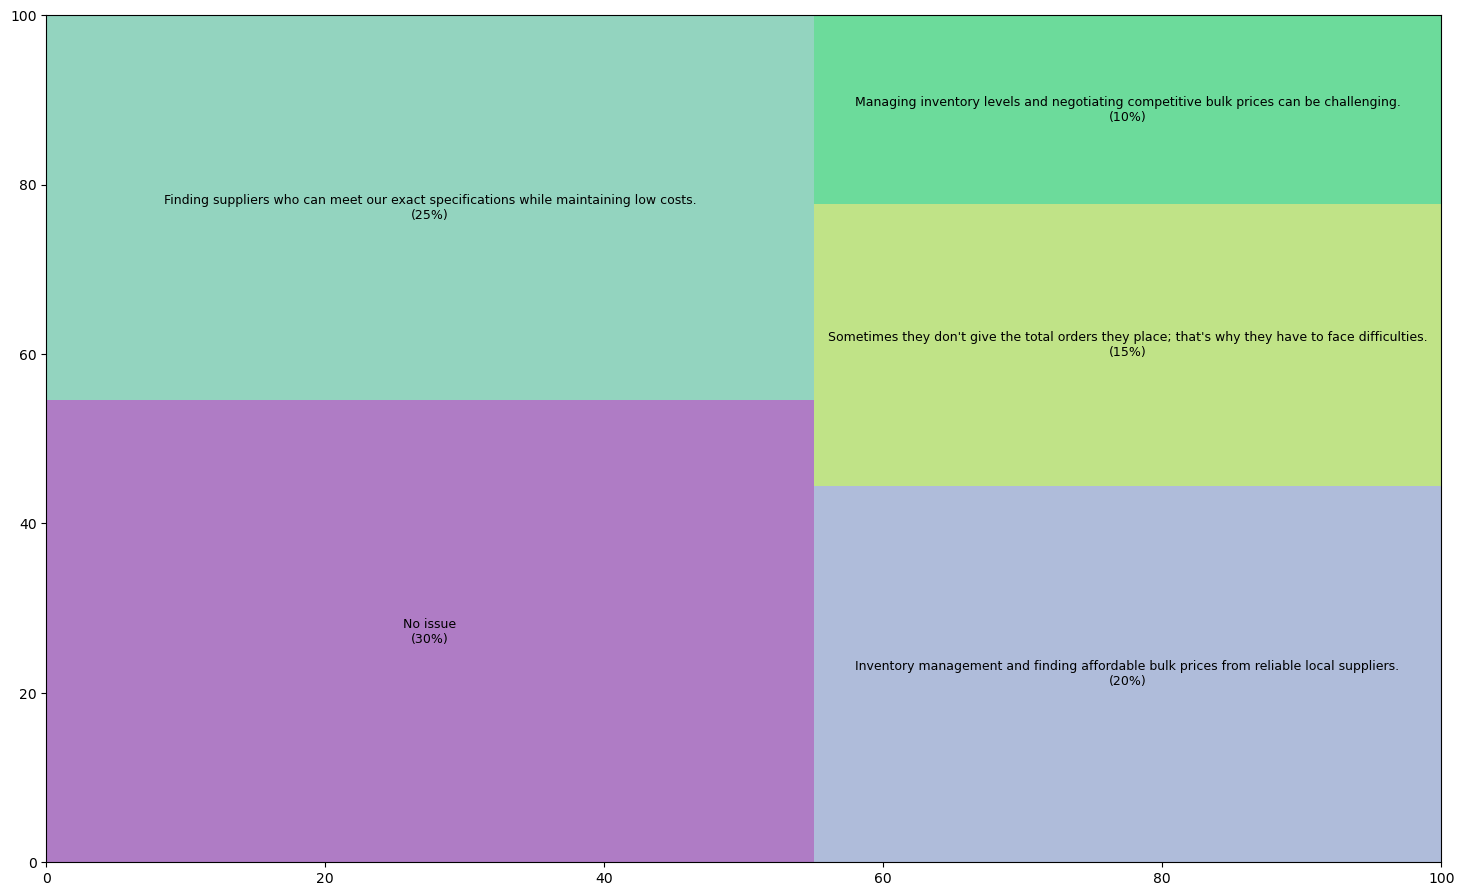

In [9]:
import squarify
import matplotlib.pyplot as plt

# Define the sizes, labels, and percentages for the treemap
sizes = [30, 25, 20, 15, 10]
labels = [
    "No issue\n(30%)",
    "Finding suppliers who can meet our exact specifications while maintaining low costs.\n(25%)",
    "Inventory management and finding affordable bulk prices from reliable local suppliers.\n(20%)",
    "Sometimes they don't give the total orders they place; that's why they have to face difficulties.\n(15%)",
    "Managing inventory levels and negotiating competitive bulk prices can be challenging.\n(10%)"
]

# Define colors for each box
colors = ['#8e44ad', '#66c2a5', '#8da0cb', '#a6d854', '#2ecc71']

# Create the plot
fig, ax = plt.subplots(figsize=(18, 11))

# Create the treemap
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, ax=ax,
              text_kwargs={'fontsize':9, 'wrap':True})

# Adjust text position manually
for i, (x, y, dx, dy) in enumerate(zip(squarify.normalize_coordinates(
        squarify.squarify(sizes, 0, 0, 1, 1), 0, 0, 1, 1))):
    ax.text(x + dx/2, y + dy/2, labels[i], ha='center', va='center', 
            fontsize=9, wrap=True)

# Remove axes
ax.axis('off')

# Set title
ax.set_title("Proportion of Challenges", fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Question 10: Would you be interested in exploring a direct supply relationship with a textile manufacturer like Jindal Texofab for your hotel's linen, uniform, and toiletry needs? 

In [26]:
import seaborn as sns

process_interest = pd.crosstab(df['Process_Type'], 
                                df["Q10. Would you be interested in exploring a direct supply relationship with a textile manufacturer like Jindal Texofab for your hotel's linen, uniform, and toiletry needs?"])

plt.figure(figsize=(12, 8))
sns.heatmap(process_interest, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Vendor Registration Process vs. Interest in Direct Supply')
plt.ylabel('Registration Process Type')
plt.xlabel('Interest in Direct Supply')
plt.tight_layout()
plt.show()

interest = df["Q10. Would you be interested in exploring a direct supply relationship with a textile manufacturer like Jindal Texofab for your hotel's linen, uniform, and toiletry needs?"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(interest.values, labels=interest.index, autopct='%1.1f%%')
plt.title('Interest in Direct Supply Relationship')
plt.show()

# Define hotel size categories
df['Size Category'] = pd.cut(df['Q2. Total no. of rooms?'], bins=[0, 20, 40, 100], labels=['Small', 'Medium', 'Large'])

plt.figure(figsize=(10, 6))
interest_by_size = df.groupby(['Size Category', "Q10. Would you be interested in exploring a direct supply relationship with a textile manufacturer like Jindal Texofab for your hotel's linen, uniform, and toiletry needs?"]).size().unstack()
interest_by_size_pct = interest_by_size.apply(lambda x: x / x.sum() * 100, axis=1)
interest_by_size_pct.plot(kind='bar', stacked=True)
plt.title('Interest in Direct Supply by Hotel Size')
plt.xlabel('Hotel Size')
plt.ylabel('Percentage')
plt.legend(title='Interest')
plt.show()

KeyError: 'Process_Type'